In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('/workspaces/Final-Year-Project/data/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.missing_values = df.isnull().sum()
df.missing_values

/tmp/ipykernel_19340/2372918804.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.missing_values = df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
zero_values = (df.drop(columns=['Outcome', 'Pregnancies']) == 0).sum()
zero_values

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [6]:
columns_to_replace = (df.drop(columns=['Outcome', 'Pregnancies']).columns)

for column in columns_to_replace:
    df[column] = df[column].replace(0, np.nan)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.nan, mean)



In [7]:
zero_values = (df.drop(columns=['Outcome', 'Pregnancies']) == 0).sum()
zero_values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

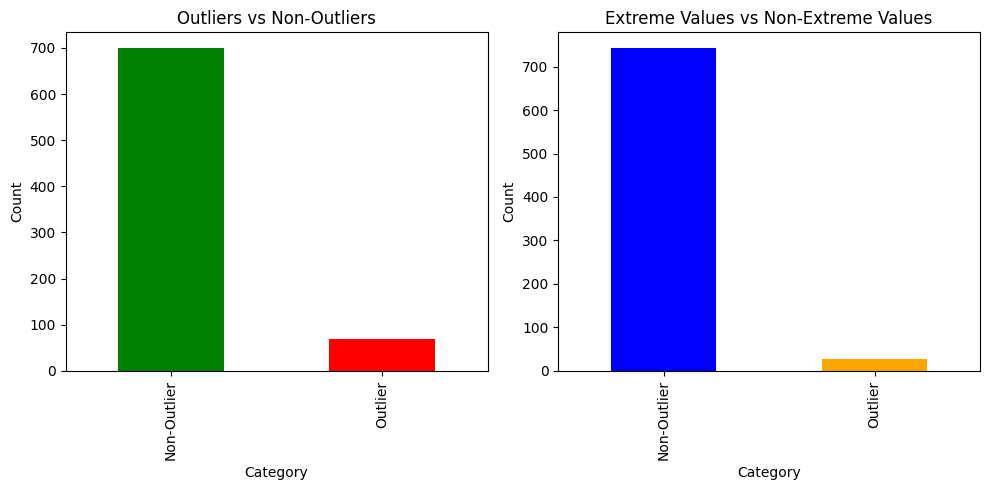

In [8]:
def label_outliers(df, multiplier=3, label='Outlier_Label'):
    df[label] = 'Non-Outlier'
    
    for column in df.select_dtypes(include=[np.number]).columns:  
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        df[label] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), 
                             'Outlier', df[label])
    
    return df

df_labeled_outliers = label_outliers(df.copy(), multiplier=3, label='Outlier_Label')

df_labeled_extreme = label_outliers(df.copy(), multiplier=6, label='Extreme_Label')

outlier_group = df_labeled_outliers.groupby('Outlier_Label').size()
extreme_group = df_labeled_extreme.groupby('Extreme_Label').size()

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
outlier_group.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Outliers vs Non-Outliers')

plt.subplot(1, 2, 2)
extreme_group.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Extreme Values vs Non-Extreme Values')

plt.tight_layout()
plt.show()


In [9]:
outlier_group

Outlier_Label
Non-Outlier    699
Outlier         69
dtype: int64

In [10]:
df_cleaned_outliers = df_labeled_outliers[df_labeled_outliers['Outlier_Label'] != 'Outlier'].drop(columns=['Outlier_Label'])

df_cleaned_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               699 non-null    int64  
 1   Glucose                   699 non-null    float64
 2   BloodPressure             699 non-null    float64
 3   SkinThickness             699 non-null    float64
 4   Insulin                   699 non-null    float64
 5   BMI                       699 non-null    float64
 6   DiabetesPedigreeFunction  699 non-null    float64
 7   Age                       699 non-null    int64  
 8   Outcome                   699 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.6 KB


Text(0.5, 1.0, 'Correlation Matrix')

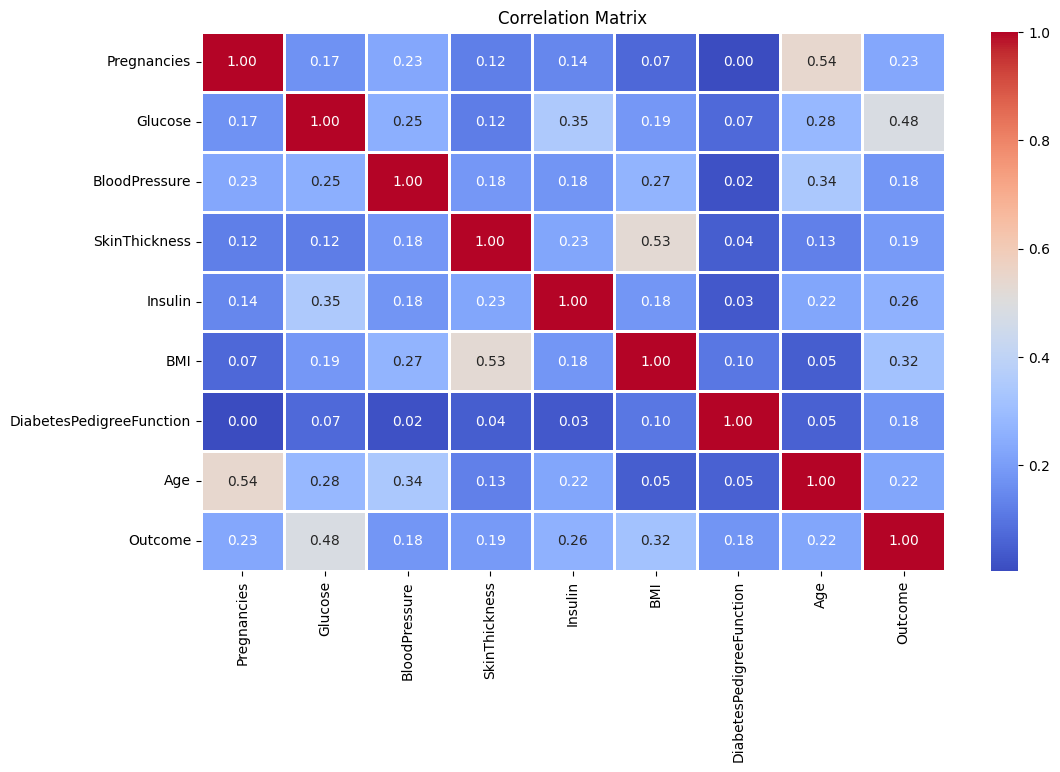

In [11]:
plt.figure(figsize=(12,7))

corr_matrix = df_cleaned_outliers.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title('Correlation Matrix')

In [12]:
from sklearn.preprocessing import MinMaxScaler

df_cleaned_outliers = df_cleaned_outliers.drop(columns=['BloodPressure', 'DiabetesPedigreeFunction', 'SkinThickness'])

columns_to_scale = df_cleaned_outliers.columns.difference(['BP', 'DPF', 'Skin Thickness'])

scaler = MinMaxScaler()

df_cleaned_outliers[columns_to_scale] = scaler.fit_transform(df_cleaned_outliers[columns_to_scale])

print(df_cleaned_outliers.head())


   Pregnancies   Glucose   Insulin       BMI       Age  Outcome
0     0.352941  0.670968  0.570815  0.393862  0.483333      1.0
1     0.058824  0.264516  0.570815  0.214834  0.166667      0.0
2     0.470588  0.896774  0.570815  0.130435  0.183333      1.0
3     0.058824  0.290323  0.309013  0.253197  0.000000      0.0
5     0.294118  0.464516  0.570815  0.189258  0.150000      0.0


In [13]:
diabetes_summary = df_cleaned_outliers['Outcome'].value_counts().reset_index()

diabetes_summary.columns = ['Outcome', 'Total_Count']

diabetes_summary

,Outcome,Total_Count
0,0.0,466
1,1.0,233


In [14]:
df_cleaned_outliers.describe()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.228646,0.483345,0.497516,0.354288,0.203648,0.333333
std,0.197746,0.186604,0.181768,0.168608,0.194508,0.471742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.354839,0.403433,0.232737,0.050000,0.000000
50%,0.176471,0.458065,0.570815,0.352941,0.133333,0.000000
75%,0.352941,0.593548,0.570815,0.452685,0.325000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine": SVC()
}

X = df_cleaned_outliers.drop(columns=['Outcome']) 
y = df_cleaned_outliers['Outcome'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("Train/Test Split Evaluation:\n")
for model_name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# 2. K-Fold Cross-Validation (using 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

print("\nK-Fold Cross-Validation Evaluation:\n")
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf)  # Perform K-fold cross-validation
    print(f"{model_name} Mean Cross-Validation Accuracy: {np.mean(scores):.2f}")



Train/Test Split Evaluation:

Decision Tree Accuracy: 0.74
K-Nearest Neighbors Accuracy: 0.74
Random Forest Accuracy: 0.84
Naive Bayes Accuracy: 0.77


/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.79
Logistic Regression Accuracy: 0.87
Support Vector Machine Accuracy: 0.86

K-Fold Cross-Validation Evaluation:

Decision Tree Mean Cross-Validation Accuracy: 0.71
K-Nearest Neighbors Mean Cross-Validation Accuracy: 0.75
Random Forest Mean Cross-Validation Accuracy: 0.75
Naive Bayes Mean Cross-Validation Accuracy: 0.75


/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

AdaBoost Mean Cross-Validation Accuracy: 0.75
Logistic Regression Mean Cross-Validation Accuracy: 0.78
Support Vector Machine Mean Cross-Validation Accuracy: 0.77
